## Kaggle Machine Learning & Data Science Survey Ext

In [95]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
import numpy as np

In [7]:
# Load the data
df = pd.read_csv('kaggle_2017_to_2020.csv', low_memory = False)

In [8]:
# Print the information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80327 entries, 0 to 80326
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Unique_Id                           80327 non-null  int64 
 1   Time                                80327 non-null  object
 2   Year                                80327 non-null  int64 
 3   Age                                 80327 non-null  object
 4   Gender                              80327 non-null  object
 5   Country                             80327 non-null  object
 6   Degree                              80327 non-null  object
 7   Job Title                           80327 non-null  object
 8   Company Size                        80327 non-null  object
 9   Team Size                           80327 non-null  object
 10  ML Status in Company                80327 non-null  object
 11  Compensation Status                 80327 non-null  ob

In [9]:
# Display first five rows
df.head()

,Unique_Id,Time,Year,Age,Gender,Country,Degree,Job Title,Company Size,Team Size,ML Status in Company,Compensation Status,Money Spent,Current role experience (in years),Programming language choice,Recommend Programming language,Coding experience (in years),Specialised HW,TPU Usage,ML Methods experience (in years)
0,0,Unknown / Not Specified,2017,25.0,Male,Argentina,Master’s degree,Machine Learning Engineer,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Cant Disclose,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Python,Unknown / Not Specified,"Basic laptop (Macbook),Traditional Workstation",Unknown / Not Specified,Unknown / Not Specified
1,1,Unknown / Not Specified,2017,21.0,Prefer not to say,Argentina,No formal education past high school,Business Analyst,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Cant Disclose,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Python,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified
2,2,Unknown / Not Specified,2017,25.0,Male,Argentina,Bachelor’s degree,Computer Scientist,50-249 employees,Unknown / Not Specified,Unknown / Not Specified,"20,001-30,000",Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Python,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified
3,3,Unknown / Not Specified,2017,28.0,Male,Argentina,Bachelor’s degree,Other,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Cant Disclose,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Python,Unknown / Not Specified,Other,Unknown / Not Specified,Unknown / Not Specified
4,4,Unknown / Not Specified,2017,38.0,Male,Argentina,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Cant Disclose,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified


In [10]:
# Check for missing values
df.isnull().sum()

Unique_Id                             0
Time                                  0
Year                                  0
Age                                   0
Gender                                0
Country                               0
Degree                                0
Job Title                             0
Company Size                          0
Team Size                             0
ML Status in Company                  0
Compensation Status                   0
Money Spent                           0
Current role experience (in years)    0
Programming language choice           0
Recommend Programming language        0
Coding experience (in years)          0
Specialised HW                        0
TPU Usage                             0
ML Methods experience (in years)      0
dtype: int64

In [11]:
# Select the columns to drop
columns_to_drop = ['Unique_Id','Time','Specialised HW']

In [12]:
# Drop the columns
df.drop(columns = columns_to_drop, inplace =True )

In [13]:
# Find how many entries with unknown comensation are missing
df['Compensation Status'].describe()

count                       80327
unique                         19
top       Unknown / Not Specified
freq                        20201
Name: Compensation Status, dtype: object

In [14]:
# Find unique values
df['Compensation Status'].unique()

array(['Cant Disclose', '20,001-30,000', '40,000-49,999', '> $500,000',
       '50,000-59,999', '10,001-20,000', '30,000-39,999',
       '300,000-500,000', '100,000-124,999', '200,000-249,999',
       '60,000-69,999', '80,000-89,999', '70,000-79,999',
       '125,000-149,999', '150,000-199,999', '250,000-299,999',
       '90,000-99,999', '0-10,000', 'Unknown / Not Specified'],
      dtype=object)

In [15]:
# Keep only entries with known compensations
filtered_df = df[df['Compensation Status'] != 'Unknown / Not Specified']
filtered_df = filtered_df[filtered_df['Compensation Status'] != 'Cant Disclose']

In [16]:
# print filtered df
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43860 entries, 2 to 80325
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Year                                43860 non-null  int64 
 1   Age                                 43860 non-null  object
 2   Gender                              43860 non-null  object
 3   Country                             43860 non-null  object
 4   Degree                              43860 non-null  object
 5   Job Title                           43860 non-null  object
 6   Company Size                        43860 non-null  object
 7   Team Size                           43860 non-null  object
 8   ML Status in Company                43860 non-null  object
 9   Compensation Status                 43860 non-null  object
 10  Money Spent                         43860 non-null  object
 11  Current role experience (in years)  43860 non-null  ob

### About 40,000 entries were removed

In [17]:
# Check the type of education present in the survey
filtered_df['Degree'].unique()

array(['Bachelor’s degree',
       'Some college/university study without earning a bachelor’s degree',
       'Master’s degree', 'Professional degree', 'Doctoral degree',
       'Unknown / Not Specified', 'No formal education past high school',
       'I prefer not to answer'], dtype=object)

In [18]:
# Remove the unknown values from education column
filtered_df = filtered_df[filtered_df['Degree'] != 'Unknown / Not Specified']

In [19]:
# Check filtered df
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43854 entries, 2 to 80325
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Year                                43854 non-null  int64 
 1   Age                                 43854 non-null  object
 2   Gender                              43854 non-null  object
 3   Country                             43854 non-null  object
 4   Degree                              43854 non-null  object
 5   Job Title                           43854 non-null  object
 6   Company Size                        43854 non-null  object
 7   Team Size                           43854 non-null  object
 8   ML Status in Company                43854 non-null  object
 9   Compensation Status                 43854 non-null  object
 10  Money Spent                         43854 non-null  object
 11  Current role experience (in years)  43854 non-null  ob

### About 2000 entries were removed

In [20]:
# Change the age column format to remove ranges and find the average
def parse_age(age):
    if '-' in age:
        low, high = age.replace(',', '').split('-')
    elif '>' in age:
        # Extract the numeric part after '>'
        low = age.replace(',', '').strip()
    else:
        # Handle other cases if needed
        low = high = age

    return pd.Series([low, high], index=['Low Age', 'High Age'])

# Apply the function to the 'Compensation Status' column
filtered_df[['Low Age', 'High Age']] = filtered_df['Age'].apply(parse_age)

# Convert 'Low Range' and 'High Range' to numeric types (floats or ints)
filtered_df['Low Age'] = pd.to_numeric(filtered_df['Low Age'], errors='coerce')
filtered_df['High Age'] = pd.to_numeric(filtered_df['High Age'], errors='coerce')

In [21]:
# Calculate the average of low and high range age
filtered_df['Average Age'] = (filtered_df['Low Age'] +  filtered_df['High Age']) / 2

In [22]:
# Drop the other age related column and keep average only
filtered_df = filtered_df.drop(columns = ['Age', 'Low Age', 'High Age'])

In [23]:
# Parse the compensation column to split between low and high range salaries
def parse_compensation(comp_range):
    if '-' in comp_range:
        low, high = comp_range.replace('$', '').replace(',', '').split('-')
    elif '>' in comp_range:
        # Extract the numeric part after '>'
        low = comp_range.replace('>', '').replace('$', '').replace(',', '').strip()
        high = None  # Set high range to None or you can use np.nan
    else:
        # Handle other cases if needed
        low = high = None

    return pd.Series([low, high], index=['Low Range Comp', 'High Range Comp'])

# Apply the function to the 'Compensation Status' column
filtered_df[['Low Range Comp', 'High Range Comp']] = filtered_df['Compensation Status'].apply(parse_compensation)

# Convert 'Low Range' and 'High Range' to numeric types (floats or ints)
filtered_df['Low Range Comp'] = pd.to_numeric(filtered_df['Low Range Comp'], errors='coerce')
filtered_df['High Range Comp'] = pd.to_numeric(filtered_df['High Range Comp'], errors='coerce')

In [24]:
filtered_df['Average Comp'] = (filtered_df['Low Range Comp'] +  filtered_df['High Range Comp']) / 2

In [25]:
filtered_df = filtered_df.drop(columns = 'Compensation Status')

In [26]:
filtered_df.head(10)

,Year,Gender,Country,Degree,Job Title,Company Size,Team Size,ML Status in Company,Money Spent,Current role experience (in years),Programming language choice,Recommend Programming language,Coding experience (in years),TPU Usage,ML Methods experience (in years),Average Age,Low Range Comp,High Range Comp,Average Comp
2,2017,Male,Argentina,Bachelor’s degree,Computer Scientist,50-249 employees,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Python,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,25.0,20001,30000.0,25000.5
7,2017,Male,Argentina,Some college/university study without earning ...,Business Analyst,"10,000 or more employees",Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,R,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,50.0,40000,49999.0,44999.5
9,2017,Male,Argentina,Master’s degree,Data Scientist,"10,000 or more employees",Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,R,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,36.0,500000,NaN,NaN
12,2017,Male,Argentina,Some college/university study without earning ...,Data Scientist,50-249 employees,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,R,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,27.0,40000,49999.0,44999.5
13,2017,Male,Argentina,Bachelor’s degree,Data Analyst,"10,000 or more employees",Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Python,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,32.0,50000,59999.0,54999.5
16,2017,Male,Argentina,Bachelor’s degree,Business Analyst,"1000-9,999 employees",Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,SQL,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,26.0,10001,20000.0,15000.5
19,2017,Male,Argentina,Professional degree,Machine Learning Engineer,50-249 employees,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,R,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,39.0,500000,NaN,NaN
20,2017,Female,Argentina,Master’s degree,Data Scientist,50-249 employees,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,R,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,33.0,30000,39999.0,34999.5
21,2017,Male,Argentina,Master’s degree,Data Scientist,"10,000 or more employees",Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Python,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,39.0,500000,NaN,NaN
22,2017,Male,Argentina,Master’s degree,Software Developer/Software Engineer,50-249 employees,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Python,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,37.0,300000,500000.0,400000.0


In [29]:
# Fill the missing average comp value with low range comp.
filtered_df['Average Comp'] = filtered_df['Average Comp'].fillna(filtered_df['Low Range Comp'])  
filtered_df['High Range Comp'] = filtered_df['High Range Comp'].fillna(filtered_df['Low Range Comp'])  

In [30]:
# Display first 10 rows 
filtered_df.head(10)

,Year,Gender,Country,Degree,Job Title,Company Size,Team Size,ML Status in Company,Money Spent,Current role experience (in years),Programming language choice,Recommend Programming language,Coding experience (in years),TPU Usage,ML Methods experience (in years),Average Age,Low Range Comp,High Range Comp,Average Comp
2,2017,Male,Argentina,Bachelor’s degree,Computer Scientist,50-249 employees,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Python,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,25.0,20001,30000.0,25000.5
7,2017,Male,Argentina,Some college/university study without earning ...,Business Analyst,"10,000 or more employees",Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,R,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,50.0,40000,49999.0,44999.5
9,2017,Male,Argentina,Master’s degree,Data Scientist,"10,000 or more employees",Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,R,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,36.0,500000,500000.0,500000.0
12,2017,Male,Argentina,Some college/university study without earning ...,Data Scientist,50-249 employees,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,R,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,27.0,40000,49999.0,44999.5
13,2017,Male,Argentina,Bachelor’s degree,Data Analyst,"10,000 or more employees",Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Python,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,32.0,50000,59999.0,54999.5
16,2017,Male,Argentina,Bachelor’s degree,Business Analyst,"1000-9,999 employees",Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,SQL,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,26.0,10001,20000.0,15000.5
19,2017,Male,Argentina,Professional degree,Machine Learning Engineer,50-249 employees,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,R,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,39.0,500000,500000.0,500000.0
20,2017,Female,Argentina,Master’s degree,Data Scientist,50-249 employees,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,R,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,33.0,30000,39999.0,34999.5
21,2017,Male,Argentina,Master’s degree,Data Scientist,"10,000 or more employees",Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Python,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,39.0,500000,500000.0,500000.0
22,2017,Male,Argentina,Master’s degree,Software Developer/Software Engineer,50-249 employees,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Python,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,37.0,300000,500000.0,400000.0


## EDA

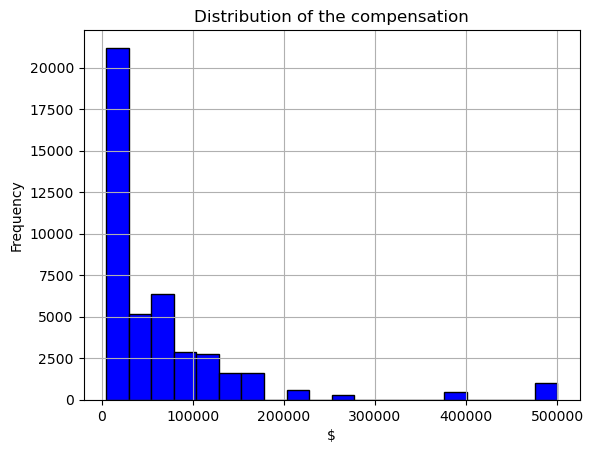

In [31]:
plt.hist(filtered_df["Average Comp"], bins=20, edgecolor='black', color='blue')
plt.title('Distribution of the compensation')
plt.xlabel('$')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

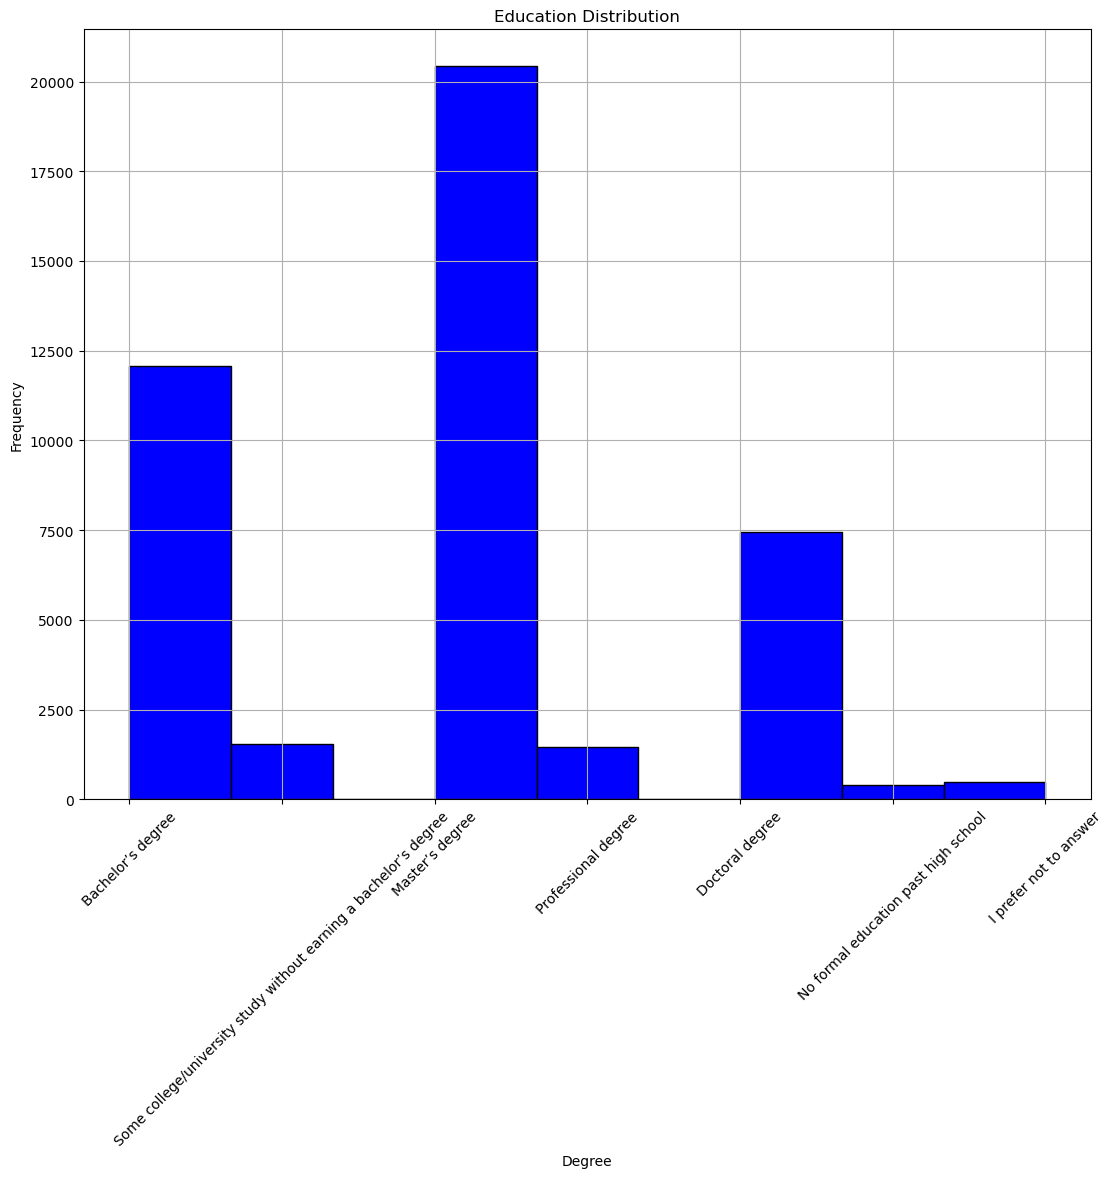

In [32]:
plt.figure(figsize = (13,10))
plt.hist(filtered_df["Degree"], bins=9, edgecolor='black', color='blue')
plt.title('Education Distribution')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.xticks(rotation = 45)
plt.grid(True)
plt.show()

## Split by formal and non formal education

In [33]:
df_no_educ = filtered_df[filtered_df['Degree'] == 'Some college/university study without earning a bachelor’s degree']

In [34]:
df_educ = filtered_df[filtered_df['Degree'] != 'Some college/university study without earning a bachelor’s degree']

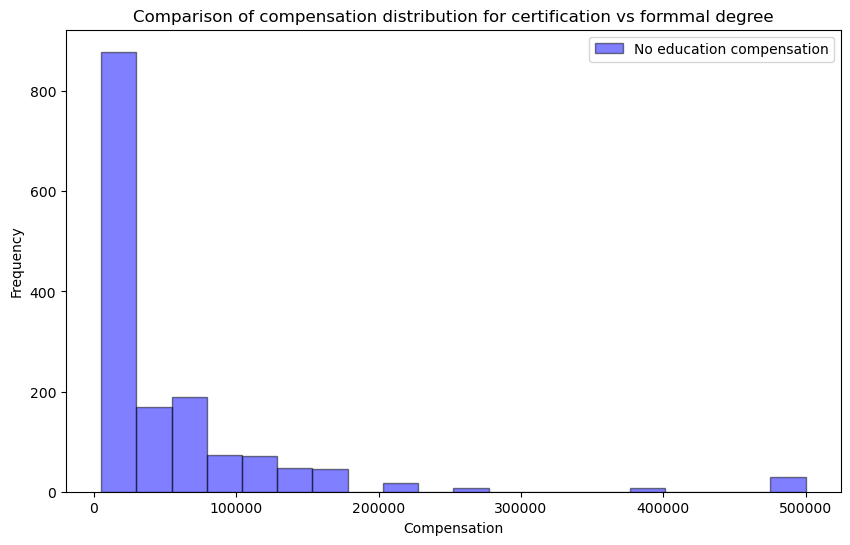

In [35]:
plt.figure(figsize=(10, 6))
plt.hist(df_no_educ['Average Comp'], bins=20, alpha=0.5, label='No education compensation', color='blue', edgecolor='black')

plt.title("Comparison of compensation distribution for certification vs formmal degree")
plt.xlabel('Compensation')
plt.ylabel('Frequency')
plt.legend()

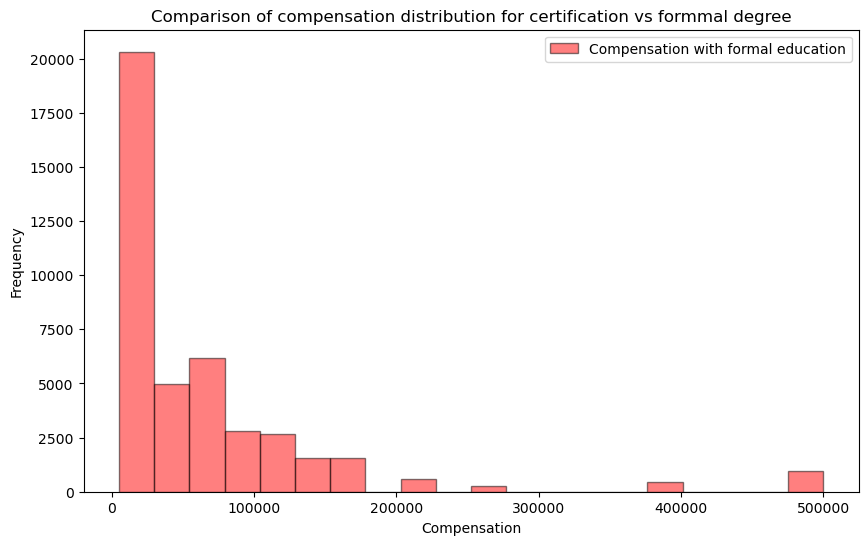

In [36]:
plt.figure(figsize=(10, 6))
plt.hist(df_educ['Average Comp'], bins=20, alpha=0.5, label='Compensation with formal education', color='red', edgecolor='black')
plt.title("Comparison of compensation distribution for certification vs formmal degree")
plt.xlabel('Compensation')
plt.ylabel('Frequency')
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


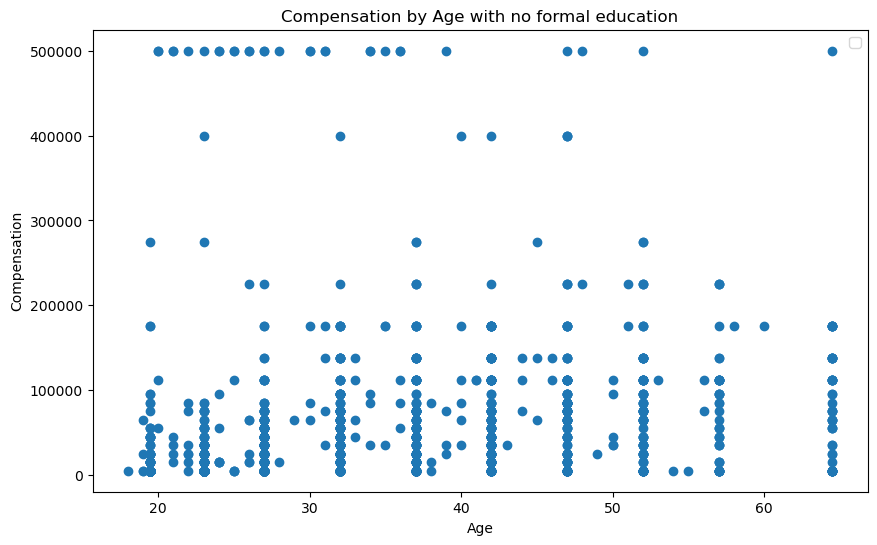

In [37]:
plt.figure(figsize=(10, 6))
plt.scatter(df_no_educ['Average Age'], df_no_educ['Average Comp'])
plt.title('Compensation by Age with no formal education')
plt.xlabel('Age')
plt.ylabel('Compensation')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


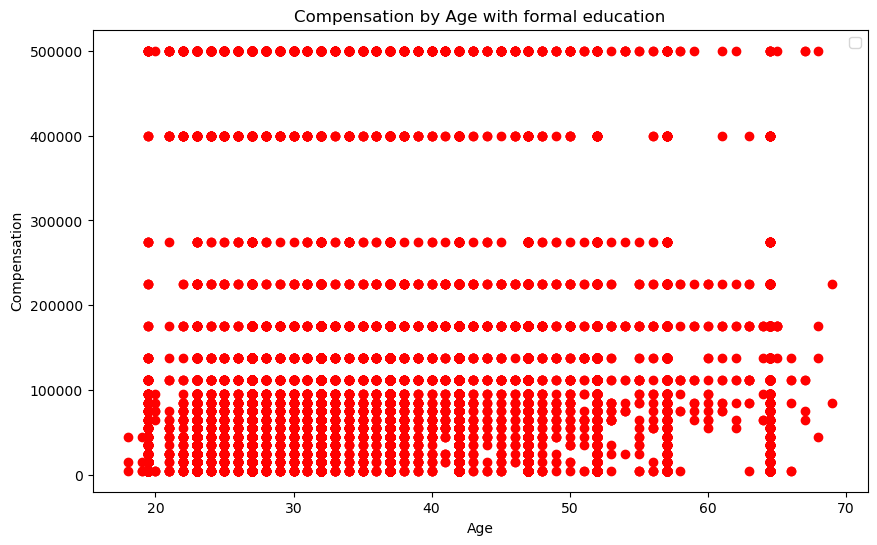

In [38]:
plt.figure(figsize=(10, 6))
plt.scatter(df_educ['Average Age'], df_educ['Average Comp'], color = 'red')
plt.title('Compensation by Age with formal education')
plt.xlabel('Age')
plt.ylabel('Compensation')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


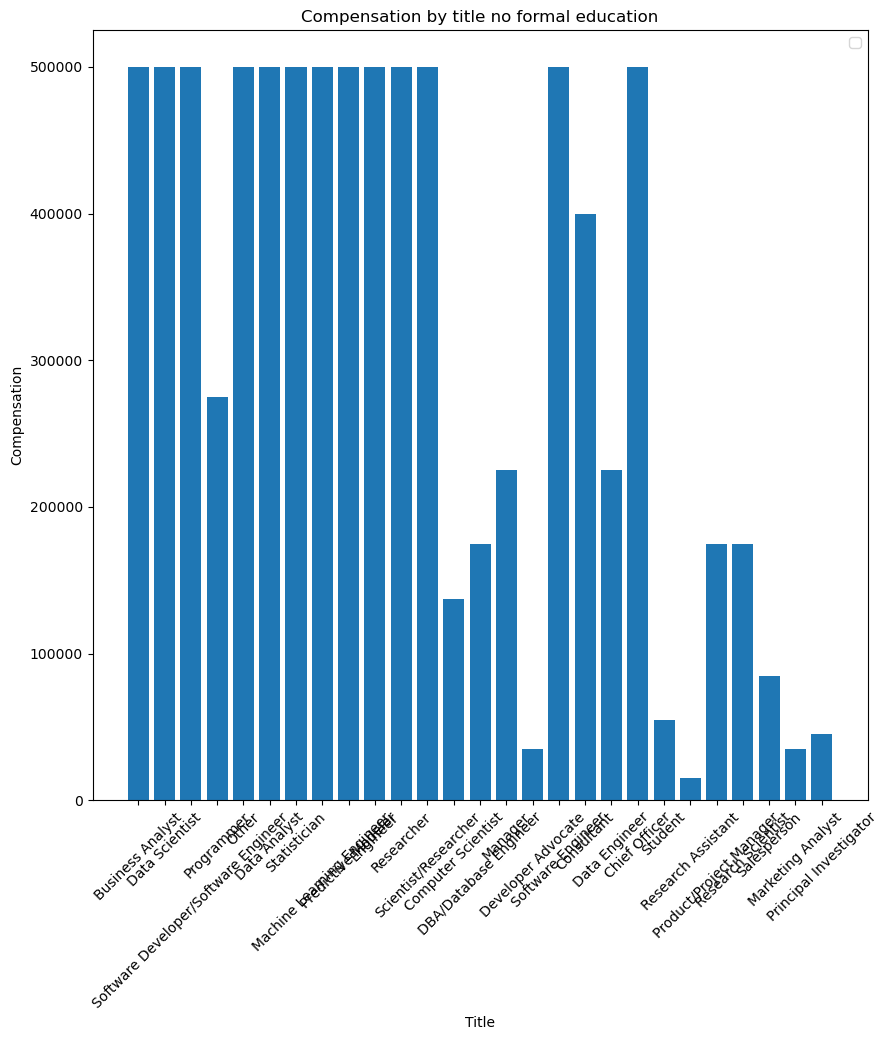

In [39]:
plt.figure(figsize=(10, 10))
plt.bar(df_no_educ['Job Title'], df_no_educ['Average Comp'])
plt.title('Compensation by title no formal education')
plt.xlabel('Title')
plt.ylabel('Compensation')
plt.xticks(rotation = 45)
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


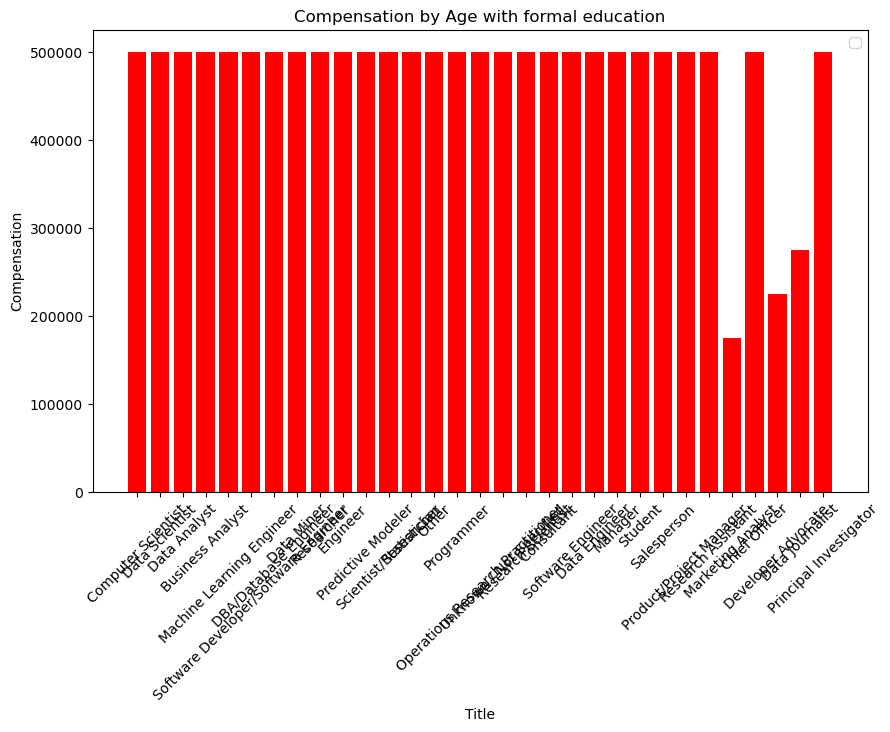

In [40]:
plt.figure(figsize=(10, 6))
plt.bar(df_educ['Job Title'], df_educ['Average Comp'], color = 'red')
plt.title('Compensation by Age with formal education')
plt.xlabel('Title')
plt.ylabel('Compensation')
plt.xticks(rotation = 45)
plt.legend()
plt.show()

### Average compensation by Gender

In [54]:
# Subset the data by gender and compensation
gender_df = filtered_df[['Gender', 'Average Comp']]
                         

In [55]:
# Group the data by gender and calculate mean salary
gender_df = gender_df.groupby('Gender').mean()

In [56]:
# Print the subseted data
gender_df

,Average Comp
Gender,
Female,51309.682919
Male,65558.769047
Nonbinary,134218.447917
Prefer not to say,75612.530635
Prefer to self-describe,97216.825472
Unknown / Not Specified,158332.916667


In [57]:
# Reset the index
gender_df = gender_df.reset_index()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


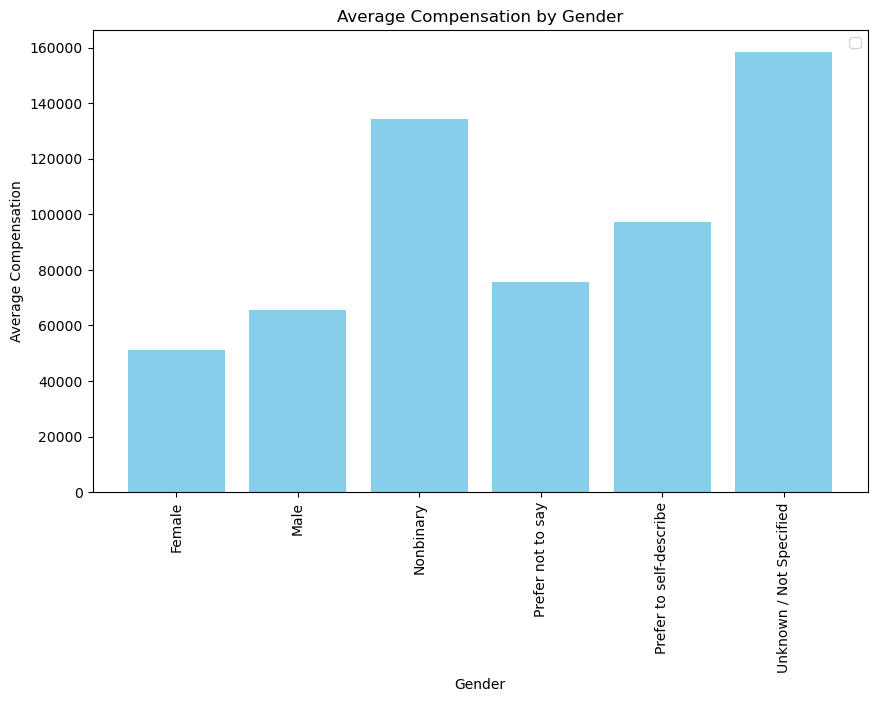

In [72]:
# Build a bar graph
plt.figure(figsize=(10, 6))
plt.bar(gender_df['Gender'], gender_df['Average Comp'], color = 'skyblue')
plt.title('Average Compensation by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Compensation')
plt.xticks(rotation = 90)
plt.legend()
plt.show()

### Average compensation by Country

In [59]:
# Subset the data by country and compensation
country_df = filtered_df[['Country', 'Average Comp']]

In [60]:
# Group the data by country and calculate mean salary
country_df = country_df.groupby('Country').mean()

In [61]:
# Print the subseted data
country_df

,Average Comp
Country,
Algeria,7500.055556
Argentina,38044.983974
Australia,103060.118294
Austria,51737.500000
Bangladesh,12484.521739
...,...
United Arab Emirates,66222.000000
United Kingdom,72494.191080
United States,113262.784111


In [63]:
# Reset the index
country_df = country_df.reset_index()

In [66]:
country_df = country_df.sort_values(by = 'Average Comp')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


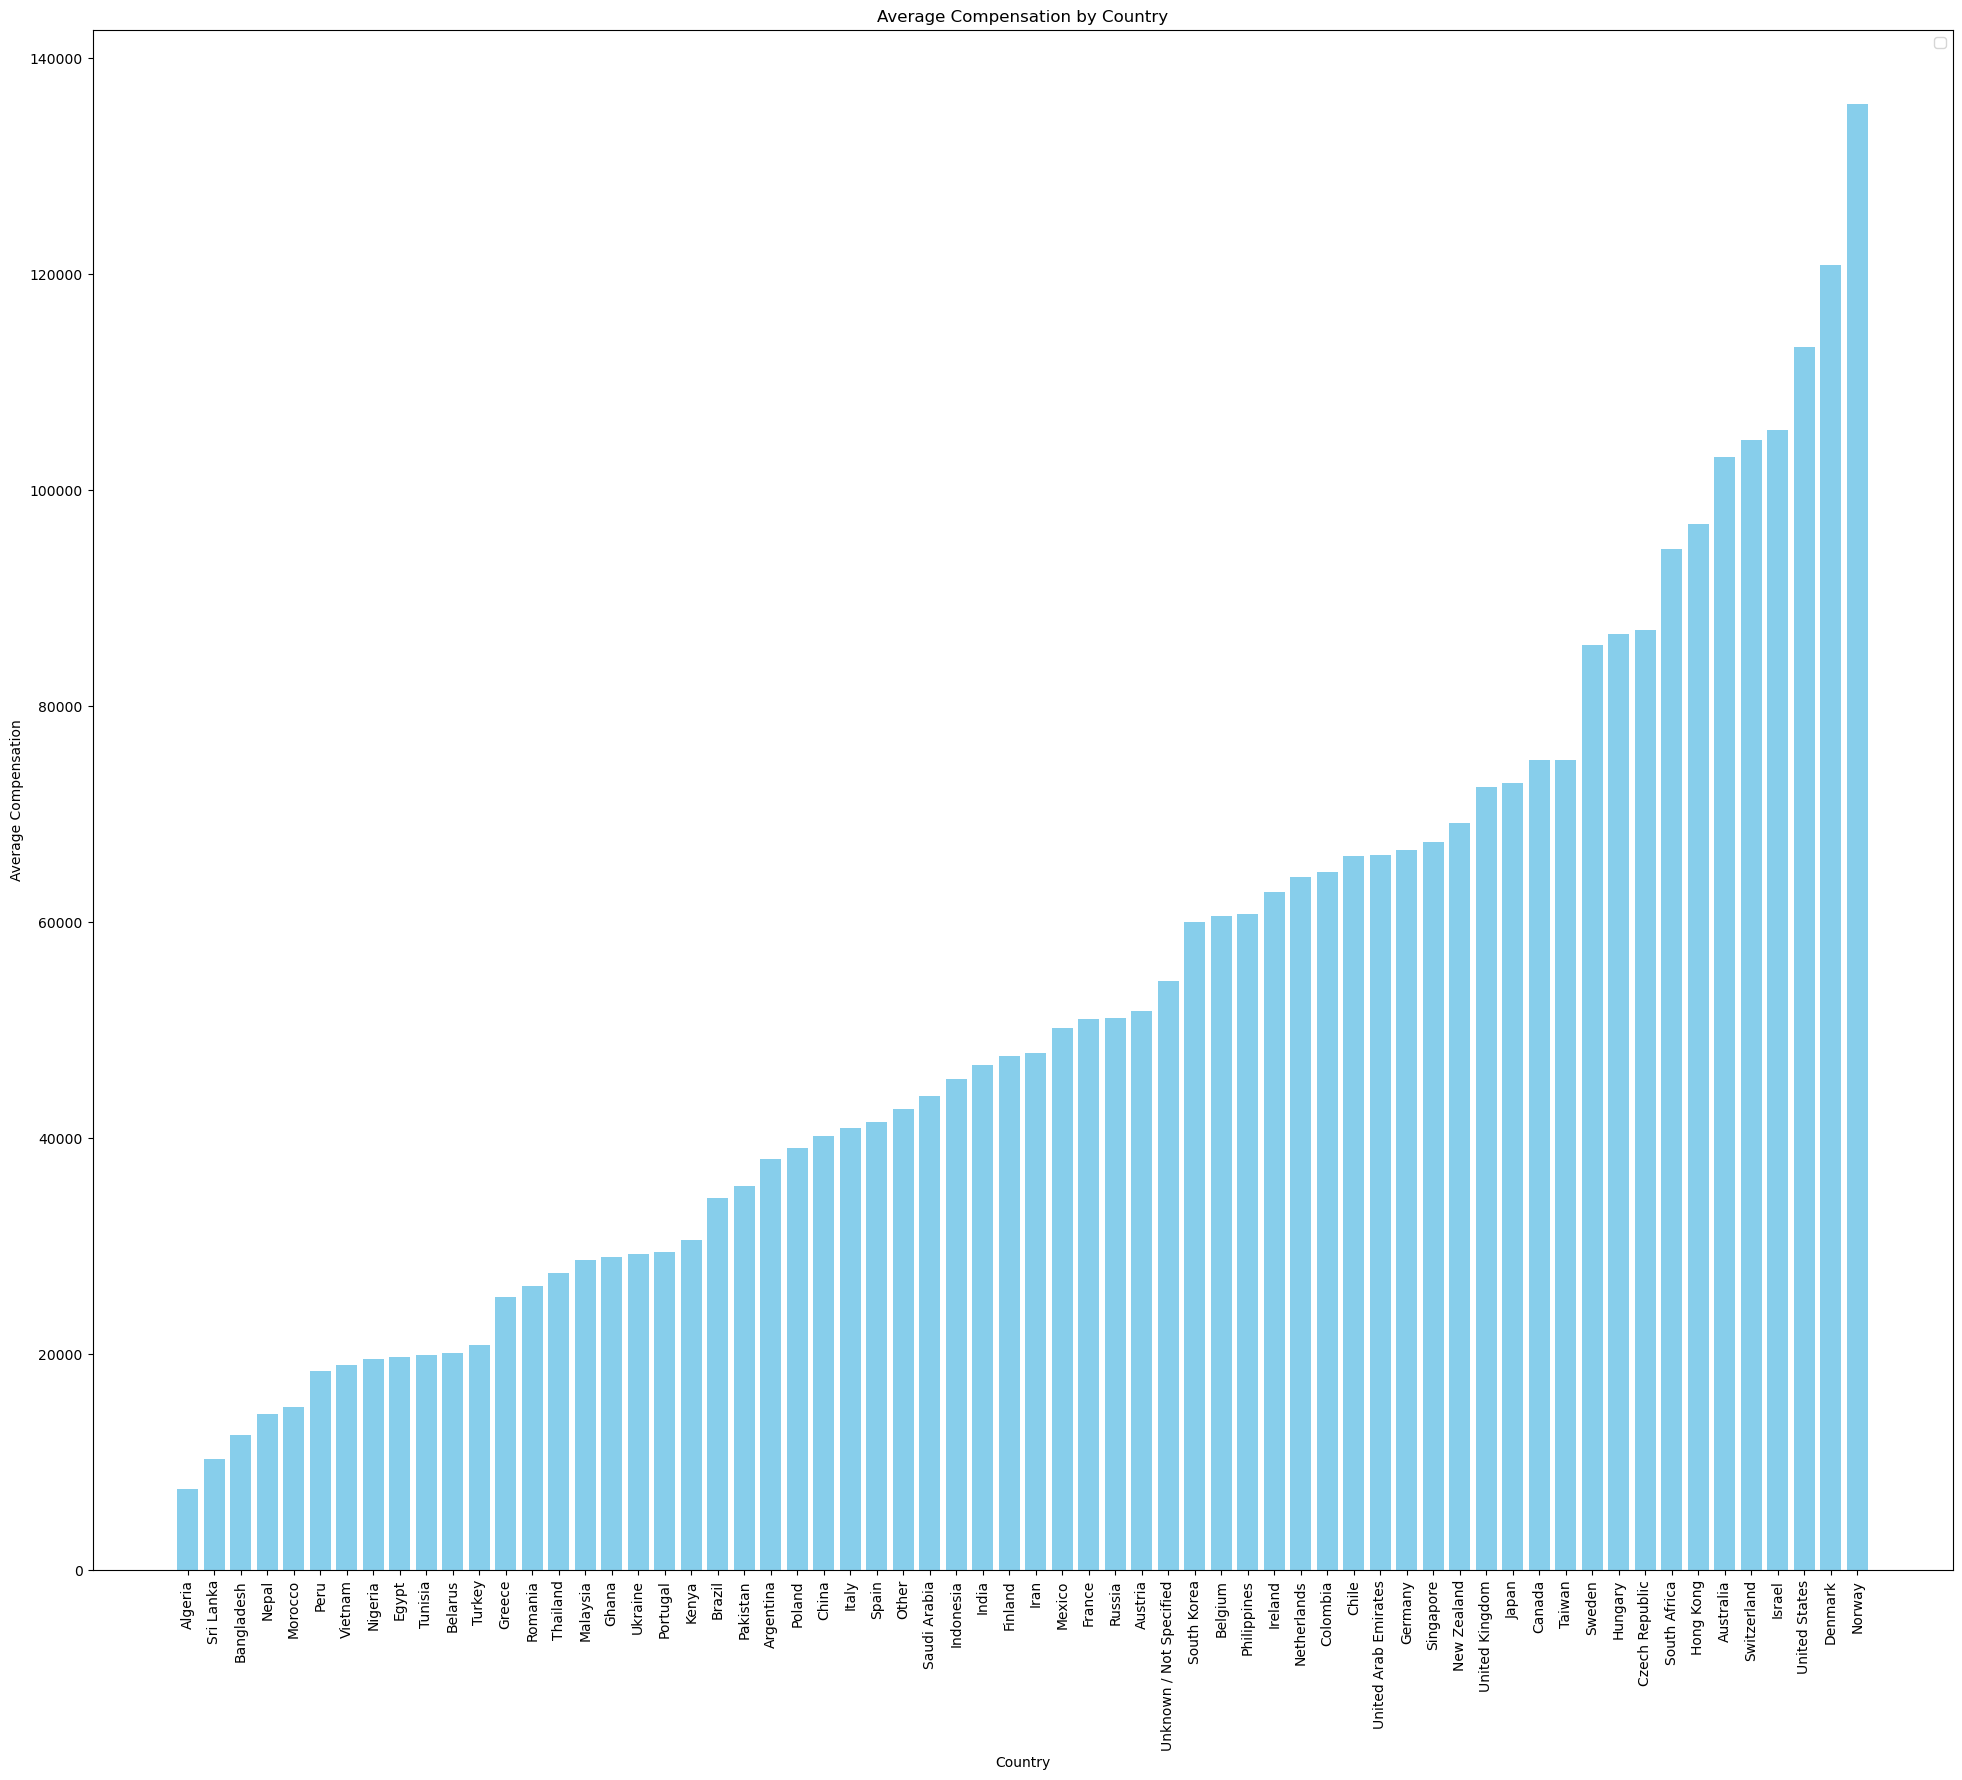

In [74]:
# Build a bar graph
plt.figure(figsize=(24, 20))
plt.bar(country_df['Country'], country_df['Average Comp'], color = 'skyblue')
plt.title('Average Compensation by Country')
plt.xlabel('Country')
plt.ylabel('Average Compensation')
plt.xticks(rotation = 90)
plt.legend()
plt.show()

### Average compensation by Job Title

In [76]:
# Subset the data by job_title and compensation
title_df = filtered_df[['Job Title', 'Average Comp']]

In [77]:
# Group the data by country and calculate mean salary
title_df = title_df.groupby('Job Title').mean()

In [79]:
# Print the subseted data
title_df

,Average Comp
Job Title,
Business Analyst,63152.485498
Chief Officer,130278.619522
Computer Scientist,133597.361789
Consultant,71832.205934
DBA/Database Engineer,66651.627232
Data Analyst,52585.516170
Data Engineer,54838.119609
Data Journalist,73249.950000
Data Miner,135713.989796


In [81]:
title_df = title_df.reset_index().sort_values(by = 'Average Comp')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


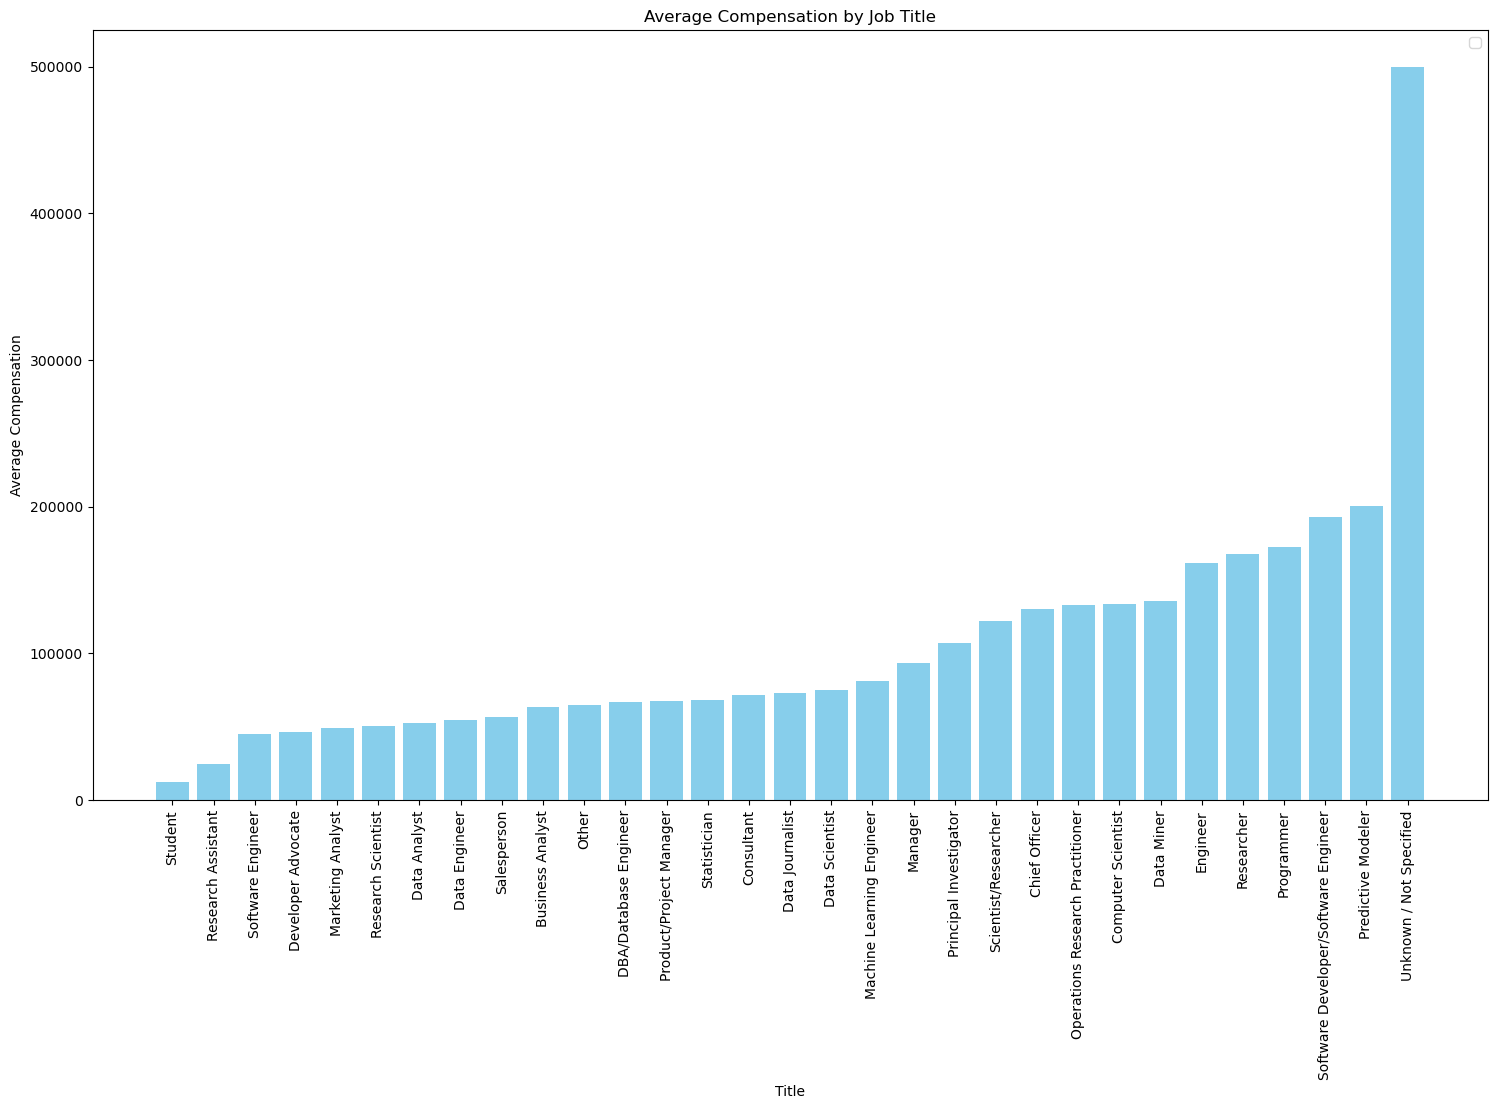

In [85]:
# Build a bar graph
plt.figure(figsize=(18, 10))
plt.bar(title_df['Job Title'], title_df['Average Comp'], color = 'skyblue')
plt.title('Average Compensation by Job Title')
plt.xlabel('Title')
plt.ylabel('Average Compensation')
plt.xticks(rotation = 90)
plt.legend()
plt.show()

### Average compensation by Job Title split by formal and informal udecation

In [ ]:
df_no_educ
df_educ

In [108]:
# Subset the data by job_title and compensation
title_df_educ = df_educ[['Job Title', 'Average Comp']]

In [109]:
# Subset the data by job_title and compensation
title_df_no_educ = df_no_educ[['Job Title', 'Average Comp']]

In [110]:
title_df_educ = title_df_educ.groupby('Job Title').mean()
title_df_no_educ = title_df_no_educ.groupby('Job Title').mean()

In [111]:
title_df_educ = title_df_educ.sort_values(by = 'Average Comp').reset_index()
title_df_no_educ = title_df_no_educ.sort_values(by = 'Average Comp').reset_index()

In [112]:
title_df_educ

,Job Title,Average Comp
0,Student,12638.931070
1,Research Assistant,24748.904110
2,Software Engineer,44591.742251
3,Marketing Analyst,49852.782353
4,Developer Advocate,50032.279221
5,Research Scientist,50691.307141
6,Data Analyst,52768.267727
7,Data Engineer,55365.998598
8,Salesperson,59143.739726
9,Business Analyst,63772.939576


In [113]:
title_df_no_educ

,Job Title,Average Comp
0,Research Assistant,7222.333333
1,Student,7263.171053
2,Developer Advocate,15000.187500
3,Marketing Analyst,30000.000000
4,Salesperson,32142.785714
5,Research Scientist,38333.250000
6,Statistician,40000.052632
7,Data Engineer,41622.622807
8,Computer Scientist,43500.000000
9,Business Analyst,44725.849315


In [114]:
unique_values = title_df_educ['Job Title'][~title_df_educ['Job Title'].isin(title_df_no_educ['Job Title'])]

In [115]:
print(unique_values)

15                     Data Journalist
22    Operations Research Practitioner
23                          Data Miner
30             Unknown / Not Specified
Name: Job Title, dtype: object


In [117]:
title_df_educ = title_df_educ[~title_df_educ['Job Title'].isin(['Data Journalist', 'Operations Research Practitioner', 'Data Miner', 'Unknown / Not Specified'])]


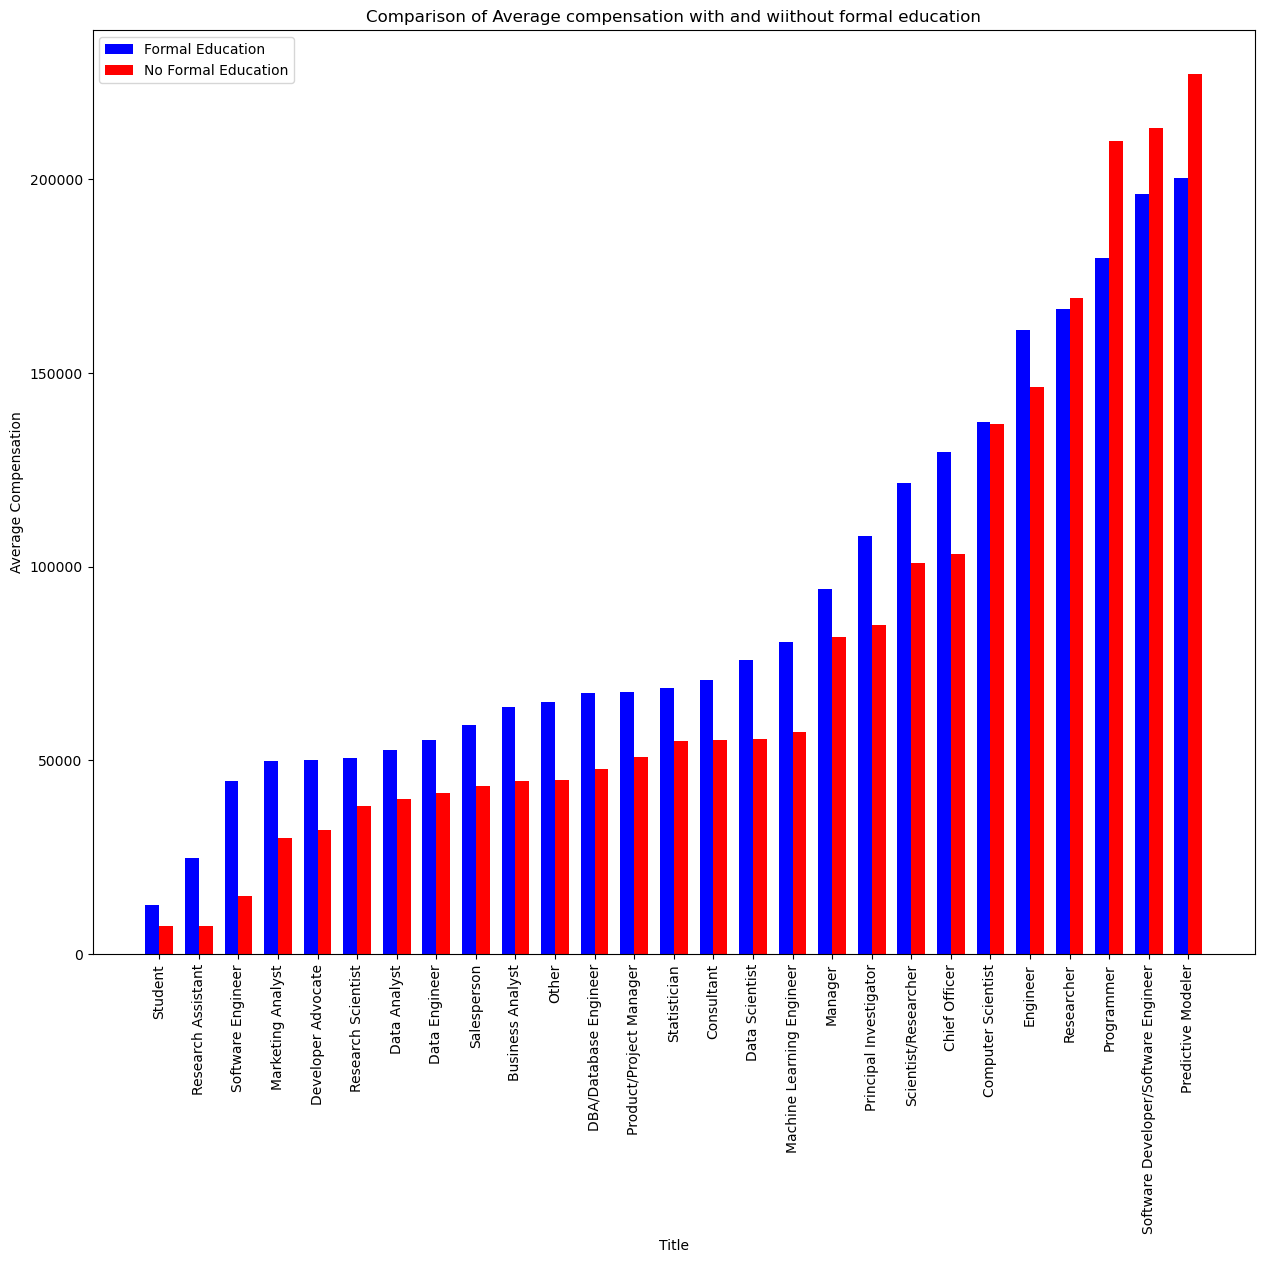

In [133]:
x = np.arange(len(title_df_educ['Job Title']))
width = 0.35

# Plotting
fig, ax = plt.subplots(figsize=(15, 12))

rects1 = ax.bar(x - width/2, title_df_educ['Average Comp'], width, label='Formal Education', color='b')
rects2 = ax.bar(x + width/2, title_df_no_educ['Average Comp'], width, label='No Formal Education', color='r')

# Adding labels and titles
ax.set_xlabel('Title')
ax.set_ylabel('Average Compensation')
ax.set_title('Comparison of Average compensation with and wiithout formal education')
ax.set_xticks(x)
ax.set_xticklabels(title_df_educ['Job Title'])
ax.legend()

# Optional: Add text labels above the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.xticks(rotation = 90)
# Show plot
plt.show()